# Цель лабораторной работы

Изучение ансамблей моделей машинного обучения.<cite data-cite="ue:lab6"></cite>

# Задание

1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите две ансамблевые модели. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.
5. Произведите для каждой модели подбор значений одного гиперпараметра. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
6. Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.

# Ход выполнения лабораторной работы

## Выбор датасета


В качестве исходных данных выбираем датасет Heart Disease UCI (https://www.kaggle.com/ronitf/heart-disease-uci). 303 записи, 14 признаков, целевой признак относится к наличию болезни сердца у пациента: 0 - нет болезни сердца, 1 - есть.

In [45]:
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from google.colab import files
import os
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline 
#os.listdir()
data = pd.read_csv('drive/My Drive/heart.csv',
                   sep=",", encoding="iso-8859-1")

In [0]:
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0:
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'
              .format(col, dt, temp_null_count, temp_perc))

data_cleared = data

In [48]:
uniquevalues = np.unique(data_cleared['target'].values)
uniquevalues

array([0, 1])

## train_test_split

In [0]:
target = data_cleared['target']
data_cleared = data_cleared.drop('target', axis=1)

In [50]:
data_cleared.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    data_cleared, 
    target, 
    test_size=0.2, 
    random_state=1
)

In [52]:
X_train.shape, Y_train.shape

((242, 13), (242,))

In [53]:
X_test.shape, Y_test.shape

((61, 13), (61,))

## Обучение

In [0]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

### Случайный лес

In [0]:
# n_estimators = 10 (default)
rfc = RandomForestClassifier().fit(X_train, Y_train)
predicted_rfc = rfc.predict(X_test)

In [56]:
accuracy_score(Y_test, predicted_rfc)

0.7377049180327869

In [57]:
balanced_accuracy_score(Y_test, predicted_rfc)

0.7370967741935484

In [58]:
(precision_score(Y_test, predicted_rfc, average='weighted'), 
 recall_score(Y_test, predicted_rfc, average='weighted'))

(0.7384500745156483, 0.7377049180327869)

In [59]:
f1_score(Y_test, predicted_rfc, average='weighted')

0.7372809496890899

### Алгоритм AdaBoost

In [0]:
# n_estimators = 50 (default)
abc = AdaBoostClassifier().fit(X_train, Y_train)
predicted_abc = abc.predict(X_test)

In [61]:
accuracy_score(Y_test, predicted_abc)

0.6721311475409836

In [62]:
balanced_accuracy_score(Y_test, predicted_abc)

0.6720430107526881

In [63]:
(precision_score(Y_test, predicted_abc, average='weighted'), 
 recall_score(Y_test, predicted_abc, average='weighted'))

(0.6721311475409836, 0.6721311475409836)

In [64]:
f1_score(Y_test, predicted_abc, average='weighted')

0.6721311475409836

Из двух представленных ансамблевых моделей с параметрами по умолчанию с задачей классификации на выбранном датасете лучше справляется модель "Случайный лес".

## Подбор гиперпараметров

### Случайный лес

In [65]:
rfc_n_range = np.array(range(5,100,5))
rfc_tuned_parameters = [{'n_estimators': rfc_n_range}]
rfc_tuned_parameters

[{'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
         90, 95])}]

In [66]:
import warnings
warnings.filterwarnings('ignore')

gs_rfc = GridSearchCV(RandomForestClassifier(), rfc_tuned_parameters, cv=5,
                      scoring='accuracy')
gs_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [67]:
gs_rfc.best_params_

{'n_estimators': 50}

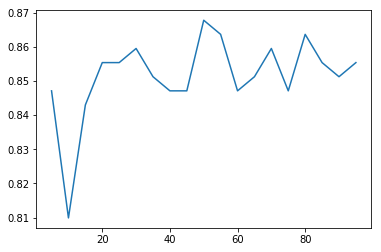

In [68]:
plt.plot(rfc_n_range, gs_rfc.cv_results_['mean_test_score'])

### Алгоритм AdaBoost

In [69]:
abc_n_range = np.array(range(5,100,5))
abc_tuned_parameters = [{'n_estimators': abc_n_range}]
abc_tuned_parameters

[{'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
         90, 95])}]

In [70]:
gs_abc = GridSearchCV(AdaBoostClassifier(), abc_tuned_parameters, cv=5,
                      scoring='accuracy')
gs_abc.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid=[{'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [71]:
gs_abc.best_params_

{'n_estimators': 10}

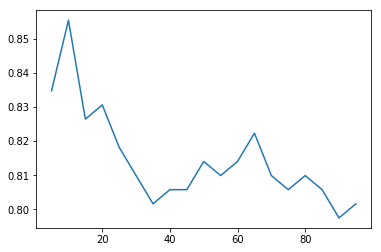

In [72]:
plt.plot(abc_n_range, gs_abc.cv_results_['mean_test_score'])

## Сравнение моделей после подбора гиперпараметров

### Случайный лес

In [0]:
rfc_optimized = RandomForestClassifier(n_estimators=gs_rfc.best_params_['n_estimators']).fit(X_train, Y_train)
predicted_rfc_opt = rfc_optimized.predict(X_test)

In [74]:
accuracy_score(Y_test, predicted_rfc_opt)

0.7704918032786885

In [75]:
balanced_accuracy_score(Y_test, predicted_rfc_opt)

0.7693548387096774

In [76]:
(precision_score(Y_test, predicted_rfc_opt, average='weighted'), 
 recall_score(Y_test, predicted_rfc_opt, average='weighted'))

(0.7747432894973878, 0.7704918032786885)

In [77]:
f1_score(Y_test, predicted_rfc_opt, average='weighted')

0.7692498758072528

### Алгоритм AdaBoost

In [0]:
abc_optimized = RandomForestClassifier(n_estimators=gs_abc.best_params_['n_estimators']).fit(X_train, Y_train)
predicted_abc_opt = abc_optimized.predict(X_test)

In [79]:
accuracy_score(Y_test, predicted_abc_opt)

0.7049180327868853

In [80]:
balanced_accuracy_score(Y_test, predicted_abc_opt)

0.7048387096774194

In [81]:
(precision_score(Y_test, predicted_abc_opt, average='weighted'), 
 recall_score(Y_test, predicted_abc_opt, average='weighted'))

(0.7049180327868853, 0.7049180327868853)

In [82]:
f1_score(Y_test, predicted_abc_opt, average='weighted')

0.7049180327868853

Подбор гиперпараметра n_estimators для моделей "Случайный лес" и "Алгоритм AdaBoost" позволил увеличить точность классификации.